In [1]:
from sympy import *

In [2]:
theta, x, y = symbols('theta, x, y', real=True)
i = I
ad_v = Matrix([
    [0, -theta, y],
    [theta, 0, -x],
    [0, 0, 0]
])

In [3]:
exp_ad = (-ad_v).exp()
exp_ad
#exp_ad.applyfunc(lambda x: x.series(theta, 0, 5))

Matrix([
[ cos(theta), sin(theta), -x*cos(theta)/theta + x/theta - y*sin(theta)/theta],
[-sin(theta), cos(theta),  x*sin(theta)/theta - y*cos(theta)/theta + y/theta],
[          0,          0,                                                  1]])

In [4]:
k = symbols('k', real=True, integer=True)
A = summation(((-1)**k/factorial(k+1))*ad_v**k, (k, 0, oo))

A = A.applyfunc(lambda term: term.expand(complex=True).factor().collect([x, y]).simplify())
A

Matrix([
[      sin(theta)/theta, (1 - cos(theta))/theta,  (x*(theta - sin(theta)) + y*(cos(theta) - 1))/theta**2],
[(cos(theta) - 1)/theta,       sin(theta)/theta, (-x*(cos(theta) - 1) + y*(theta - sin(theta)))/theta**2],
[                     0,                      0,                                                       1]])

In [51]:
A_inv = A.inv().applyfunc(lambda term: term.simplify().factor())@eye(3)  # multiply by identify to make non-immutable
A_inv = A_inv.applyfunc(lambda term: term.collect([x, y]).collect(theta))
A_inv

Matrix([
[-theta*sin(theta)/(2*(cos(theta) - 1)),                               -theta/2,   (theta*y*(cos(theta) - 1) + x*(theta*sin(theta) + 2*cos(theta) - 2))/(2*theta*(cos(theta) - 1))],
[                               theta/2, -theta*sin(theta)/(2*(cos(theta) - 1)), -(theta*x*(cos(theta) - 1) + y*(-theta*sin(theta) - 2*cos(theta) + 2))/(2*theta*(cos(theta) - 1))],
[                                     0,                                      0,                                                                                                 1]])

In [52]:
U = A_inv@(-ad_v).exp()
U = U.applyfunc(lambda term: term.trigsimp().collect([x, y]))
U

Matrix([
[-theta*sin(theta)/(2*(cos(theta) - 1)),                                theta/2, (x*(sin(theta)/2 + cos(theta)/theta - 1/theta) + y*(1/2 - cos(theta)/2))/(cos(theta) - 1)],
[                              -theta/2, -theta*sin(theta)/(2*(cos(theta) - 1)), (x*(cos(theta)/2 - 1/2) + y*(sin(theta)/2 + cos(theta)/theta - 1/theta))/(cos(theta) - 1)],
[                                     0,                                      0,                                                                                         1]])

This could be used for feedback linearization. If multiplied by u, would make u look like linear u.

In [53]:
U_series = U.applyfunc(lambda x: x.series(theta, 0, 5))
U_series

Matrix([
[1 - theta**2/12 - theta**4/720 + O(theta**5),                                      theta/2, -y/2 + theta*x/12 + theta**3*x/720 + O(theta**5)],
[                                    -theta/2, 1 - theta**2/12 - theta**4/720 + O(theta**5),  x/2 + theta*y/12 + theta**3*y/720 + O(theta**5)],
[                                           0,                                            0,                                                1]])

In [54]:
U_inv = U.inv()
U_inv = U_inv.applyfunc(lambda t: trigsimp(t).collect([x, y]))
#U_inv[0, 2] = U_inv[0, 2].collect([theta*y, x, y]).collect(1- cos(theta))
#U_inv[1, 2] = U_inv[1, 2].collect([theta*x, x, y]).collect(1- cos(theta))
U_inv

Matrix([
[      sin(theta)/theta, -(1 - cos(theta))/theta, (x*(-2*theta*cos(theta) + 2*theta - 2*sin(theta) + sin(2*theta)) + y*(-4*cos(theta) + cos(2*theta) + 3))/(2*theta**2*(1 - cos(theta)))],
[(1 - cos(theta))/theta,        sin(theta)/theta,  (x*(-4*cos(theta) + cos(2*theta) + 3) + y*(2*theta*cos(theta) - 2*theta + 2*sin(theta) - sin(2*theta)))/(2*theta**2*(cos(theta) - 1))],
[                     0,                       0,                                                                                                                                      1]])

In [55]:
U_inv_series = U_inv.applyfunc(lambda x: x.series(theta, 0, 5))
U_inv_series

Matrix([
[1 - theta**2/6 + theta**4/120 + O(theta**5),        -theta/2 + theta**3/24 + O(theta**5),  y/2 + theta*x/6 - theta**2*y/24 - theta**3*x/120 + theta**4*y/720 + O(theta**5)],
[        theta/2 - theta**3/24 + O(theta**5), 1 - theta**2/6 + theta**4/120 + O(theta**5), -x/2 + theta*y/6 + theta**2*x/24 - theta**3*y/120 - theta**4*x/720 + O(theta**5)],
[                                          0,                                           0,                                                                                1]])

In [56]:
B = Matrix([[1, 0], [0, 0], [0, 1]])
L = diag(1, 0, 1)
K = Matrix([[1, 0, 0], [0, 1, 1]])
res = (U@L@U_inv - eye(3))@B@K
res = res.applyfunc(lambda x: x.expand(trig=True).simplify())
res

Matrix([
[cos(theta)/2 - 1/2, (-theta*y*cos(theta) + theta*y + x*sin(theta)**2 + 2*x*cos(theta) - 2*x - y*sin(theta) + y*sin(2*theta)/2)/(2*theta*(cos(theta) - 1)), (-theta*y*cos(theta) + theta*y + x*sin(theta)**2 + 2*x*cos(theta) - 2*x - y*sin(theta) + y*sin(2*theta)/2)/(2*theta*(cos(theta) - 1))],
[     -sin(theta)/2,                                                     (theta*y + x*cos(theta) - x - y*sin(theta))*sin(theta)/(2*theta*(cos(theta) - 1)),                                                     (theta*y + x*cos(theta) - x - y*sin(theta))*sin(theta)/(2*theta*(cos(theta) - 1))],
[                 0,                                                                                                                                     0,                                                                                                                                     0]])

In [57]:
res_series = res.applyfunc(lambda x: series(x, theta))
res_series

Matrix([
[            -theta**2/4 + theta**4/48 + O(theta**6),       theta*x/4 - theta**2*y/12 - theta**3*x/48 + theta**4*y/240 + theta**5*x/1440 + O(theta**6),       theta*x/4 - theta**2*y/12 - theta**3*x/48 + theta**4*y/240 + theta**5*x/1440 + O(theta**6)],
[-theta/2 + theta**3/12 - theta**5/240 + O(theta**6), x/2 - theta*y/6 - theta**2*x/12 + theta**3*y/45 + theta**4*x/240 - theta**5*y/1512 + O(theta**6), x/2 - theta*y/6 - theta**2*x/12 + theta**3*y/45 + theta**4*x/240 - theta**5*y/1512 + O(theta**6)],
[                                                  0,                                                                                                0,                                                                                                0]])

In [58]:
test = (U_series*U_inv_series)
test.simplify()
test

Matrix([
[1 + O(theta**5),     O(theta**5), O(theta**5)],
[    O(theta**5), 1 + O(theta**5), O(theta**5)],
[              0,               0,           1]])

In [59]:
test = (U*U_inv)
test.simplify()
test

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [60]:
u, v, w = symbols('u, v, w', real=True)
out = U@Matrix([u, v, w])
out

Matrix([
[-theta*u*sin(theta)/(2*(cos(theta) - 1)) + theta*v/2 + w*(x*(sin(theta)/2 + cos(theta)/theta - 1/theta) + y*(1/2 - cos(theta)/2))/(cos(theta) - 1)],
[-theta*u/2 - theta*v*sin(theta)/(2*(cos(theta) - 1)) + w*(x*(cos(theta)/2 - 1/2) + y*(sin(theta)/2 + cos(theta)/theta - 1/theta))/(cos(theta) - 1)],
[                                                                                                                                                 w]])

In [61]:
out.applyfunc(lambda term: term.collect([x, y]))

Matrix([
[-theta*u*sin(theta)/(2*(cos(theta) - 1)) + theta*v/2 + w*(x*(sin(theta)/2 + cos(theta)/theta - 1/theta) + y*(1/2 - cos(theta)/2))/(cos(theta) - 1)],
[-theta*u/2 - theta*v*sin(theta)/(2*(cos(theta) - 1)) + w*(x*(cos(theta)/2 - 1/2) + y*(sin(theta)/2 + cos(theta)/theta - 1/theta))/(cos(theta) - 1)],
[                                                                                                                                                 w]])

In [62]:
res = Matrix([U[0,2]]).jacobian(Matrix([theta, x, y]))
res.simplify()
res

Matrix([[x*(-theta**2*cos(theta) + theta**2 + 4*cos(theta) - cos(2*theta) - 3)/(2*theta**2*(cos(theta) - 1)**2), (theta*sin(theta)/2 + cos(theta) - 1)/(theta*(cos(theta) - 1)), -1/2]])

In [63]:
out.applyfunc(lambda x: x.series(theta).removeO())

Matrix([
[ theta**5*w*x/30240 - theta**4*u/720 + theta**3*w*x/720 - theta**2*u/12 + theta*(v/2 + w*x/12) + u - w*y/2],
[theta**5*w*y/30240 - theta**4*v/720 + theta**3*w*y/720 - theta**2*v/12 + theta*(-u/2 + w*y/12) + v + w*x/2],
[                                                                                                         w]])

This looks like it will fit within the BIBO (bounded-input, bounded-output) problem structure.

It is worth noting that w is not scaled here.

In [71]:
U = -U
U

Matrix([
[theta*sin(theta)/(2*(cos(theta) - 1)),                              -theta/2, -(x*(sin(theta)/2 + cos(theta)/theta - 1/theta) + y*(1/2 - cos(theta)/2))/(cos(theta) - 1)],
[                              theta/2, theta*sin(theta)/(2*(cos(theta) - 1)), -(x*(cos(theta)/2 - 1/2) + y*(sin(theta)/2 + cos(theta)/theta - 1/theta))/(cos(theta) - 1)],
[                                    0,                                     0,                                                                                         -1]])

In [72]:
w_svals = U[2, :].singular_values()[0]
w_svals

1

In [73]:
uv_sval = U[:2, :].singular_values()[0]
term1 = -theta**2*cos(theta) + theta**2 -2*theta*sin(theta) + theta*sin(2*theta) - 4*cos(theta) + cos(2*theta) + 3
term2 = -theta**2*cos(theta)**2 + 2*theta**2*cos(theta) - theta**2 - 2*theta*sin(theta)**3 - 4*theta*sin(theta)*cos(theta) + 4*theta*sin(theta) + 2*cos(theta)**3 - 6*cos(theta)**2 + 6*cos(theta) - 2
v = symbols('v', real=True)
uv_sval = uv_sval.collect([x, y]).collect([term1, term2])
uv_sval = uv_sval.subs(x**2 + y**2, v)
uv_sval = uv_sval.collect(theta).simplify()
uv_sval

sqrt((v*sqrt((cos(theta) - 1)**3*(theta**4*(cos(theta) - 1) + 2*theta**3*(2*sin(theta) - sin(2*theta)) - theta**2*(-9*cos(theta) + cos(3*theta) + 8) + 2*theta*(5*sin(theta) - 4*sin(2*theta) + sin(3*theta)) + 15*cos(theta) - 6*cos(2*theta) + cos(3*theta) - 10)) + (-2*theta**4*(cos(theta) - 1) + v*(-theta**2*(cos(theta) - 1) - theta*(2*sin(theta) - sin(2*theta)) - 4*cos(theta) + cos(2*theta) + 3))*(cos(theta) - 1))/(theta**2*(cos(theta) - 1)**3))/2

In [74]:
U[0, :].singular_values()[0]

sqrt((-2*theta**4*cos(theta) + 2*theta**4 - theta**2*x**2*cos(2*theta)/2 + theta**2*x**2/2 + 2*theta**2*x*y*sin(theta) - theta**2*x*y*sin(2*theta) - 2*theta**2*y**2*cos(theta) + theta**2*y**2*cos(2*theta)/2 + 3*theta**2*y**2/2 - 4*theta*x**2*sin(theta) + 2*theta*x**2*sin(2*theta) + 8*theta*x*y*cos(theta) - 2*theta*x*y*cos(2*theta) - 6*theta*x*y - 8*x**2*cos(theta) + 2*x**2*cos(2*theta) + 6*x**2)/(theta**2*(cos(theta) - 1)**2))/2

In [75]:
U[1, :].singular_values()[0]

sqrt((-2*theta**4*cos(theta) + 2*theta**4 - 2*theta**2*x**2*cos(theta) + theta**2*x**2*cos(2*theta)/2 + 3*theta**2*x**2/2 - 2*theta**2*x*y*sin(theta) + theta**2*x*y*sin(2*theta) - theta**2*y**2*cos(2*theta)/2 + theta**2*y**2/2 - 8*theta*x*y*cos(theta) + 2*theta*x*y*cos(2*theta) + 6*theta*x*y - 4*theta*y**2*sin(theta) + 2*theta*y**2*sin(2*theta) - 8*y**2*cos(theta) + 2*y**2*cos(2*theta) + 6*y**2)/(theta**2*(cos(theta) - 1)**2))/2

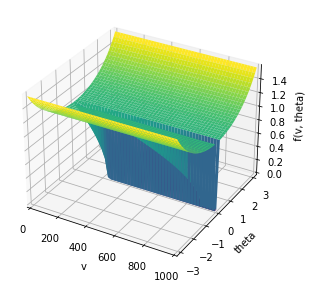

In [76]:
from sympy.plotting import plot3d
plot3d(uv_sval, (v, 0, 1000), (theta, -pi, pi))

It is clear that the v term must cancel, as the expression is independent of v.

Neglecting the terms that depend on v we arrive at.

In [77]:
uv_sval_simp = uv_sval.subs(v, 0)
uv_sval_simp

sqrt(2)*sqrt(-1/(cos(theta) - 1))*Abs(theta)/2

In [78]:
uv_sval_simp.subs(theta, pi)

pi/2

Now we can compute the maximum amplificatoin of the uv disturbance, which occurs at +/- $\pi$.

Therefore, we can treat this as a standard BIBO problem, where we the amplification of u, v input magnitude by $\pi/2$. There is no amplification of the w disturbance.

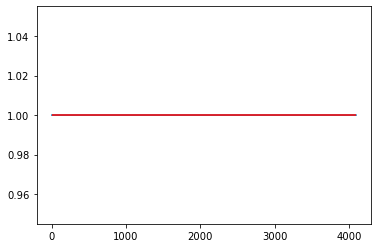

In [79]:
import matplotlib.pyplot as plt
import numpy as np
data = []
n = 4
for xi in np.linspace(-1, 1, n):
    for yi in np.linspace(-1, 1, n):
        for thetai in np.linspace(-np.pi, np.pi, n):
            for ui in np.linspace(-1, 1, n):
                for vi in np.linspace(-1, 1, n):
                    for wi in np.linspace(-1, 1, n):
                        v = np.array([ui, vi, wi])
                        w2 = np.array(U[2, :].subs({x: xi, y: yi, theta: thetai}), dtype=float)@v
                        data.append(np.linalg.norm(w2)/np.linalg.norm(wi))
res = np.array(data, dtype=float)
plt.plot(res)
plt.hlines(1, 0, len(res), color='red')

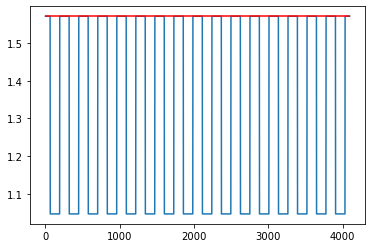

In [80]:
data = []
n = 4
for xi in np.linspace(-1, 1, n):
    for yi in np.linspace(-1, 1, n):
        for thetai in np.linspace(-np.pi, np.pi, n):
            for ui in np.linspace(-1, 1, n):
                for vi in np.linspace(-1, 1, n):
                    for wi in np.linspace(-1, 1, n):
                        uv = np.array([ui, vi])
                        uv2 = np.array(U[:2, :2].subs({x: xi, y: yi, theta: thetai}), dtype=float)@uv
                        data.append(np.linalg.norm(uv2)/np.linalg.norm(uv))
res = np.array(data, dtype=float)
plt.plot(res)
plt.hlines(np.pi/2, 0, len(res), color='r')

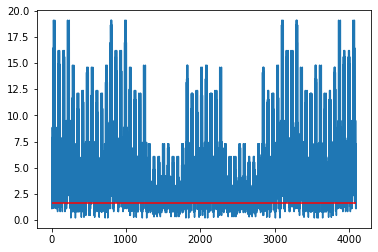

In [81]:
data = []
n = 4
for xi in np.linspace(-10, 10, n):
    for yi in np.linspace(-10, 10, n):
        for thetai in np.linspace(-np.pi, np.pi, n):
            for ui in np.linspace(-10, 10, n):
                for vi in np.linspace(-10, 10, n):
                    for wi in np.linspace(-10, 10, n):
                        v = np.array([ui, vi, wi])
                        v2 = np.array(U.subs({x: xi, y: yi, theta: thetai}), dtype=float)@v
                        data.append(np.linalg.norm(v2[:2])/np.linalg.norm(v[:2]))
res = np.array(data, dtype=float)
plt.plot(res)
plt.hlines(np.pi/2, 0, len(res), color='r')

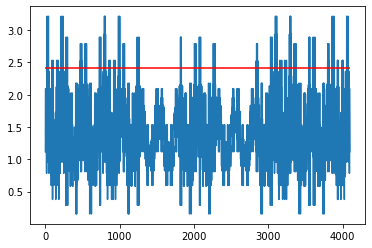

In [82]:
data = []
n = 4
d = 1
for xi in np.linspace(-d, d, n):
    for yi in np.linspace(-d, d, n):
        for thetai in np.linspace(-np.pi, np.pi, n):
            for ui in np.linspace(-d, d, n):
                for vi in np.linspace(-d, d, n):
                    for wi in np.linspace(-d, d, n):
                        v = np.array([ui, vi, wi])
                        uv = np.array([ui, vi])
                        uv2 = np.array(U[:2, :].subs({x: xi, y: yi, theta: thetai}), dtype=float)@v
                        data.append(np.linalg.norm(uv2)/np.linalg.norm(uv))
res = np.array(data, dtype=float)
plt.plot(res)
plt.hlines(np.pi/2 + np.sqrt(4 + np.pi**2)*np.sqrt(2*d**2)/(2*np.pi)*d, 0, len(res), color='r')

In [31]:
ad_so2 = Matrix([[0, -theta],[theta, 0]])
ad_so2

Matrix([
[    0, -theta],
[theta,      0]])

In [35]:
A1 = Matrix([[1-cos(theta), -sin(theta)],[sin(theta), 1-cos(theta)]])
A1

Matrix([
[1 - cos(theta),    -sin(theta)],
[    sin(theta), 1 - cos(theta)]])

In [40]:
A2 = A1@ad_so2.inv()
A2

Matrix([
[       sin(theta)/theta, (1 - cos(theta))/theta],
[-(1 - cos(theta))/theta,       sin(theta)/theta]])

In [42]:
A2_inv = A2.inv()
A2_inv

Matrix([
[           theta*sin(theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1), (theta*cos(theta) - theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1)],
[(-theta*cos(theta) + theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1),           theta*sin(theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1)]])

In [37]:
k = symbols('k', real=True, integer=True)
A = summation(((-1)**k/factorial(k+1))*ad_so2**k, (k, 0, oo))

A = A.applyfunc(lambda term: term.expand(complex=True).factor().collect([x, y]).simplify())
A

Matrix([
[      sin(theta)/theta, (1 - cos(theta))/theta],
[(cos(theta) - 1)/theta,       sin(theta)/theta]])

In [27]:
A_inv = A.inv()
A_inv

Matrix([
[           theta*sin(theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1), (theta*cos(theta) - theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1)],
[(-theta*cos(theta) + theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1),           theta*sin(theta)/(sin(theta)**2 + cos(theta)**2 - 2*cos(theta) + 1)]])

In [29]:
U = A_inv@(-ad_so2).exp()

In [30]:
U = U.applyfunc(lambda term: term.trigsimp().collect([]))
U

Matrix([
[-theta*sin(theta)/(2*(cos(theta) - 1)),                                theta/2],
[                              -theta/2, -theta*sin(theta)/(2*(cos(theta) - 1))]])

In [44]:
U1 = A2_inv@(-ad_so2).exp()
U1 = U1.applyfunc(lambda term: term.trigsimp().collect([]))
U1


Matrix([
[-theta*sin(theta)/(2*(cos(theta) - 1)),                                theta/2],
[                              -theta/2, -theta*sin(theta)/(2*(cos(theta) - 1))]])

In [47]:
U2 = A1.inv()@ad_so2@(-ad_so2).exp()
U2 = U2.applyfunc(lambda term: term.trigsimp().collect([]))
U2

Matrix([
[-theta*sin(theta)/(2*(cos(theta) - 1)),                                theta/2],
[                              -theta/2, -theta*sin(theta)/(2*(cos(theta) - 1))]])